In [0]:
# !pip install tensorflow-gpu

In [0]:
# !unzip /content/drive-download-20200428T190033Z-001.zip

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding ,Bidirectional
from sklearn.model_selection import train_test_split
import torch
from sklearn.model_selection import train_test_split

In [0]:
d = pd.read_csv('/content/FinalTrainingOnly.tsv', sep="\t", header=None )

x=d[1]
y=d[2]
y=list(y)
x=list(x)

for i in range(len(x)):
  if type(x[i])==float:
    x[i]=" "
    y[i]= 1

y=np.array(y)

In [0]:
v = pd.read_csv('/content/ValidationOnly.tsv', sep="\t", header=None )

vx=v[1]
vy=v[2]
vy=list(vy)
vx=list(vx)

for i in range(len(vx)):
  if type(vx[i])==float:
    vx[i]=" "
    vy[i]= 1

vy=np.array(vy)

In [0]:
t = pd.read_csv('/content/FinalTest.tsv', sep="\t", header=None )
tx=list(t[1])
for i in range(len(tx)):
  if type(tx[i])==float:
    tx[i]=" "

In [0]:
ty = pd.read_csv('/content/Ty.txt', sep=",", header=None )
sentiment = []
for i in range(len(ty)):
    if ty[1][i]=='negative':
        sentiment.append(0)
    elif ty[1][i]=='neutral':
        sentiment.append(1)
    elif ty[1][i]=='positive':
        sentiment.append(2)

ty = np.array(sentiment)

In [0]:
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(x)

X= tokenizer.texts_to_sequences(x)
X = pad_sequences(X,maxlen=50)

VX= tokenizer.texts_to_sequences(vx)
VX = pad_sequences(VX,maxlen=50)


TX = tokenizer.texts_to_sequences(tx)
TX = pad_sequences(TX,maxlen=50)

In [0]:
vocab_size = 20000
embed_size = 128
epochs = 200

In [0]:
# Model no 4

ip = tf.keras.Input(shape=(X.shape[1]))
b = Embedding(vocab_size, embed_size,trainable=True)(ip)
c1 = tf.keras.layers.Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(b)
c2 = tf.keras.layers.Conv1D(64, kernel_size=4, padding='valid', kernel_initializer='glorot_uniform')(b)
c3 = tf.keras.layers.Conv1D(64, kernel_size=5, padding='valid', kernel_initializer='glorot_uniform')(b)
x = tf.keras.layers.concatenate([c1, c2, c3],axis=1)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.reshape(x,(-1,1,64))
x = Dense(64,activation='tanh')(x)
x = Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs=ip, outputs=x)
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])
# model.summary()
history = model.fit(X, y, epochs=epochs, batch_size=128,verbose=2,validation_data=(VX,vy))

Train on 14594 samples, validate on 3000 samples
Epoch 1/200
14594/14594 - 16s - loss: 0.8944 - accuracy: 0.5699 - val_loss: 0.7730 - val_accuracy: 0.6477
Epoch 2/200
14594/14594 - 15s - loss: 0.7534 - accuracy: 0.6649 - val_loss: 0.6322 - val_accuracy: 0.7570
Epoch 3/200
14594/14594 - 15s - loss: 0.6138 - accuracy: 0.7437 - val_loss: 0.7200 - val_accuracy: 0.6963
Epoch 4/200
14594/14594 - 15s - loss: 0.4791 - accuracy: 0.8146 - val_loss: 0.4365 - val_accuracy: 0.8453
Epoch 5/200
14594/14594 - 15s - loss: 0.3261 - accuracy: 0.8873 - val_loss: 0.5402 - val_accuracy: 0.8147
Epoch 6/200
14594/14594 - 15s - loss: 0.3366 - accuracy: 0.8839 - val_loss: 0.4460 - val_accuracy: 0.8633
Epoch 7/200
14594/14594 - 15s - loss: 0.2906 - accuracy: 0.9010 - val_loss: 0.4603 - val_accuracy: 0.8587
Epoch 8/200
14594/14594 - 15s - loss: 0.2698 - accuracy: 0.9102 - val_loss: 0.4756 - val_accuracy: 0.8560
Epoch 9/200
14594/14594 - 15s - loss: 0.3055 - accuracy: 0.8965 - val_loss: 0.5063 - val_accuracy: 0.83

In [0]:
a = model.predict(VX)
a = np.reshape(a,(3000,3))
a = np.array(a)
a = np.argmax(a,axis=1)

In [0]:
for i in range(len(a)):
  print(str(a[i])+"     "+str(vy[i]))

2     2
0     0
0     0
1     1
2     2
1     2
2     2
2     2
2     2
1     2
2     2
2     2
1     0
1     1
1     1
2     1
1     1
2     2
2     2
2     2
1     0
2     2
2     2
0     0
2     2
2     2
0     0
0     0
2     2
0     0
0     0
1     1
0     0
1     1
0     0
2     2
0     0
2     2
1     0
2     2
2     2
1     1
0     0
0     0
1     2
1     1
0     0
1     1
1     2
1     2
0     0
1     2
1     1
1     2
1     1
1     1
1     1
1     1
1     2
2     2
0     0
1     1
1     2
1     2
0     0
1     0
2     2
1     1
1     2
2     2
0     0
0     0
2     2
0     0
0     1
0     1
1     2
1     1
0     0
1     1
1     1
1     1
2     1
2     2
1     0
0     0
1     1
2     2
2     1
1     1
2     2
0     0
2     2
1     1
0     0
0     0
2     2
1     1
1     1
0     0
1     0
0     0
1     1
1     1
2     2
1     1
0     0
0     0
1     1
2     2
0     0
1     2
1     1
0     0
0     0
1     1
1     1
2     2
2     2
0     0
1     1
0     0
2     2
2     2
2     2


In [0]:
val_loss, val_acc = model.evaluate(VX,vy)
print("validation accuracy = " + str(val_acc) )

3000/3000 [==============================] - 1s 280us/sample - loss: 0.6457 - accuracy: 0.7757
validation accuracy = 0.77566665


In [0]:
test_loss, test_acc = model.evaluate(TX,ty)
print("Test accuracy = " + str(test_acc) )

3000/3000 [==============================] - 1s 272us/sample - loss: 1.2217 - accuracy: 0.5737
Test accuracy = 0.5736667


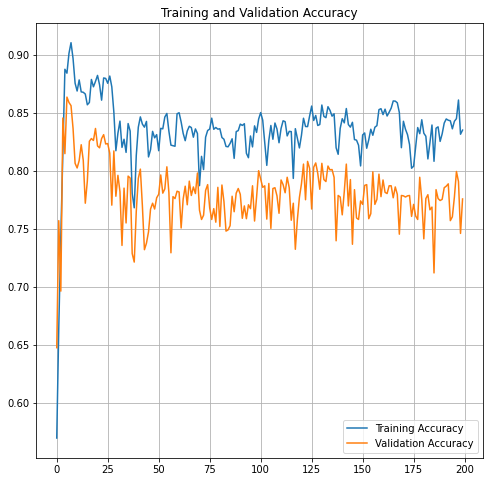

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

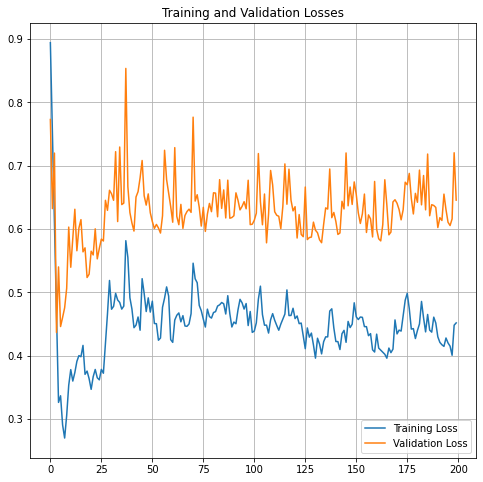

In [0]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.grid()
plt.legend(loc='lower right')
plt.title('Training and Validation Losses')
plt.show()